In [1]:
import numpy as np
import scipy
from PIL import Image
import argparse
from scipy.signal import convolve2d
from matplotlib import pyplot as plt
import math

In [2]:
### firstly, write function for 1-level 2d haar DWT(Discrete Wavelet Transform)
def haar2dlvl1(im):
# Parameters:
    # im: (2**N) * (2**N) array, image grey array
# Returens:
    # out: (2**N) * (2**N) array, Haar wavelet coefficients with level 1
    
    # Main function:
    ## Here, no need to do padding since our assumption is, the image is (2**N) * (2**N)
    
    a, _ = im.shape
    out = np.zeros((a, a))
    H = np.array([[1,1], [1,1]]) / 2
    G1 = np.array([[-1,-1], [1,1]]) / 2
    G2 = np.array([[-1,1], [-1,1]]) / 2
    G3 = np.array([[1, -1], [-1,1]]) / 2
    
    H_rev, G1_rev, G2_rev, G3_rev = H[::-1, ::-1], G1[::-1, ::-1], G2[::-1, ::-1], G3[::-1, ::-1]
    
    out[0: int(a/2), 0: int(a/2)] = convolve2d(im, H_rev)[1::2, 1::2]
    out[int(a/2):, 0: int(a/2)] = convolve2d(im, G1_rev)[1::2, 1::2]
    out[0: int(a/2), int(a/2):] = convolve2d(im, G2_rev)[1::2, 1::2]
    out[int(a/2):, int(a/2):] = convolve2d(im, G3_rev)[1::2, 1::2]
    
    return out
    
def haar2d(im, lvl):
# Computing 2D discrete Haar wavelet transform of a given ndarray im.
# Parameters: 
#   im: ndarray.    An array representing image
#   lvl: integer.   An integer representing the level of wavelet decomposition
#  Returns:
#   out: ndarray.   An array representing Haar wavelet coefficients with lvl level. It has the same shape as im

# ----
# Insert your code here
    a, _ = im.shape
    #out = np.zeros((a,a))
    ##out = im.copy()
    for i in range(lvl):
        tmp = 2**(i)
        scale = int(a/tmp)
        #if i == 0:
        #    input_haarlvl1 = im
        #else:
        #    input_haarlvl1 = out[0:scale, 0:scale]
        #out[0:scale, 0:scale] = haar2dlvl1(input_haarlvl1)
        if i == 0:
            # we should change the data type (image is uint8)
            ## out = haar2dlvl1(out[0:scale, 0:scale])
            out = haar2dlvl1(im)
        else:
            out[0:scale, 0:scale] = haar2dlvl1(out[0:scale, 0:scale])
# ----
    return out

In [19]:
def ihaar2dlvl1(coef):
    a, _ = coef.shape
    
    H = np.array([[1,1], [1,1]]) / 2
    G1 = np.array([[-1,-1], [1,1]]) / 2
    G2 = np.array([[-1,1], [-1,1]]) / 2
    G3 = np.array([[1, -1], [-1,1]]) / 2
    
    tmp = np.zeros((a,a))
    tmp[0::2, 0::2] = coef[0:int(a/2), 0:int(a/2)]
    out = convolve2d(tmp, H)[0:-1, 0:-1]
    tmp[0::2, 0::2] = coef[int(a/2):, 0:int(a/2)]
    out = out + convolve2d(tmp, G1)[0:-1, 0:-1]
    tmp[0::2, 0::2] = coef[0:int(a/2), int(a/2):]
    out = out + convolve2d(tmp, G2)[0:-1, 0:-1]
    tmp[0::2, 0::2] = coef[int(a/2):, int(a/2):]
    out = out + convolve2d(tmp, G3)[0:-1, 0:-1]
    
    return out
    
    
def ihaar2d(coef,lvl):
# Computing an image in the form of ndarray from the ndarray coef which represents its DWT coefficients.
# Parameters: 
#   coef: ndarray   An array representing 2D Haar wavelet coefficients
#   lvl: integer.   An integer representing the level of wavelet decomposition
#  Returns:
#   out: ndarray.   An array representing the image reconstructed from its Haar wavelet coefficients.

# ----
# Insert your code here
    a, _ = coef.shape
    out = coef.copy()
    for i in range(lvl-1, -1, -1):
        tmp = 2**(i)
        scale = int(a/tmp)
        out[0:scale, 0:scale] = ihaar2dlvl1(out[0:scale, 0:scale])
        
# ----
    return np.uint8(out)

In [4]:
#parser = argparse.ArgumentParser(description="wavelet")
#parser.add_argument("--img_path",  type=str, default='./test.png',  help='The test image path')
#parser.add_argument("--level", type=int, default=4, help="The level of wavelet decomposition")
#parser.add_argument("--save_pth", type=str, default='./recovery.png', help="The save path of reconstructed image ")
#opt = parser.parse_args()

#img_path = opt.img_path # The test image path
img_path = './image_512.png'
#level = opt.level # The level of wavelet decomposition
level = 4
#save_pth = opt.save_pth
save_pth = './recovery.png'


img = np.array(Image.open(img_path).convert('L'))
haar2d_coef = haar2d(img,level)
#recovery =  Image.fromarray(ihaar2d(haar2d_coef,level),mode='L')
#recovery.save(save_pth)
#np.save('./haar2_coeff.npy',haar2d_coef)
    
    

In [23]:
img

array([[153, 153, 153, ..., 153, 170, 153],
       [153, 153, 136, ..., 170, 170, 136],
       [153, 153, 153, ..., 153, 170, 153],
       ...,
       [ 17,  34,  34, ...,  68,  85,  68],
       [ 17,  17,  34, ...,  68,  85,  68],
       [ 17,  17,  34, ...,  85,  68,  85]], dtype=uint8)

In [25]:
haar2d_coef = haar2d(img,level)
ihaar2d(haar2d_coef,level)

array([[153, 153, 153, ..., 153, 170, 153],
       [153, 153, 136, ..., 170, 170, 136],
       [153, 153, 153, ..., 153, 170, 153],
       ...,
       [ 17,  34,  34, ...,  68,  85,  68],
       [ 17,  17,  34, ...,  68,  85,  68],
       [ 17,  17,  34, ...,  85,  68,  85]], dtype=uint8)

In [26]:
haar2d_coef

array([[2316.25  , 2261.    , 2457.5625, ...,   34.    ,    0.    ,
         -25.5   ],
       [2278.    , 2317.3125, 2461.8125, ...,   34.    ,   -8.5   ,
         -17.    ],
       [2358.75  , 2435.25  , 2372.5625, ...,   25.5   ,   -8.5   ,
         -17.    ],
       ...,
       [   0.    ,    8.5   ,    0.    , ...,    0.    ,   -8.5   ,
          -8.5   ],
       [   0.    ,    8.5   ,    0.    , ...,   -8.5   ,    0.    ,
          -8.5   ],
       [   0.    ,    8.5   ,   -8.5   , ...,    0.    ,    8.5   ,
          17.    ]])

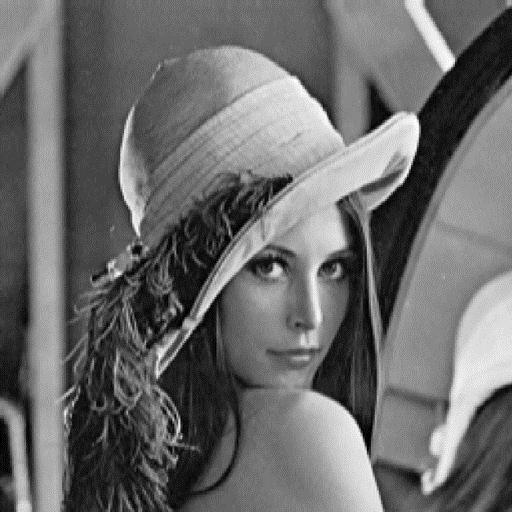

In [21]:
Image.fromarray(ihaar2d(haar2d_coef,level),mode='L')

In [67]:
## non 2^k case
sig = np.random.rand(13,13)

In [72]:
def gen_haar2d(im, lvl):
    a, _ = im.shape
    pad_number = math.ceil(np.log2(a))
    im_pad = np.zeros((2**pad_number, 2**pad_number))
    im_pad[:a, :a] = im
    
    return haar2d(im_pad, lvl), a

In [73]:
coef, length = gen_haar2d(sig, 2)

In [74]:
sig = np.random.rand(13,13)
coef, length = gen_haar2d(sig, 2)
rec = ihaar2d(coef, 2)[:length,:length]

In [75]:
sig[0,:]

array([0.1006841 , 0.62233588, 0.33786554, 0.77277118, 0.98325852,
       0.50163564, 0.29727657, 0.91165509, 0.66210054, 0.78174138,
       0.93200931, 0.47161546, 0.23179266])

In [76]:
rec[0,:]

array([0.1006841 , 0.62233588, 0.33786554, 0.77277118, 0.98325852,
       0.50163564, 0.29727657, 0.91165509, 0.66210054, 0.78174138,
       0.93200931, 0.47161546, 0.23179266])